# Project Check-in 5

**Clustering:**
- Code: is shown below alongside graphs/plots
- Quantitative Metrics to evaluate clustering
  - We created a clustering using both Hierarchical and K-Means. For each of these we tested various methods of normalization and k values to reach a clustering that informed us the most about our data.
  - Out final models had the following metrics
    - Silhouette Score for K-Means 0.1249274056780295
    - Silhouette Score for H-Clustering 0.10101739209808032
    - Rand Score 0.8621218471269019
    - Adjusted Rand Score 0.7242411396957116
- How you determined the number of clusters for your data and why
  - We used WCSS (Within-Cluster Sum of Squares) method to determine the best k value, this measures the total variance within each cluster
  - We ran the k-means algorithm for k values between 1 and 10, and plotted each of their WCSS values
  - Now can lookfor some elbow point, where there is a much smaller marginal benefit of increasing the number of clusters
  - The elbow for our current normalization was obserbed with 2 clusters, which also provided clarity to inform us the most about our data
  - Note: For other methods of normalization such as normalizing all variables, we observed elbows at 3 and 4, however they provided worse silhoutte scores and didn't present a clear story to better interpret the data.
- Explain how clustering helped you learn about the structure of data for your project.
  - The clustering, more specifically the K-means clustering that we performed helped describe two different archetypes of students that we have in our data. Although the silhoutte values are very modest as the clustering isn't perfect, partially due to many features that may not have a large impact on the score, or missing features that drive a stronger relationship
  - However, from observing the means from each of the two clusters we witness a higher dedication/time commitment group that studies longer, attends more class, and performs better on the exam. This group also tends to be more privallaged, having more tutoring sessions, parent involvement, closer to the school, etc. In fact, every feature that you would expect to be more apparent in this group, appears at a higher value than the other cluster. The other cluster has lower values for all these features, as well as a lower exam score


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

complete_data = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [138]:
# Clean the data by removing rows with empty values
columns_to_drop = ["Extracurricular_Activities", "Peer_Influence", "Physical_Activity", "Gender"]
data = complete_data.drop(columns=columns_to_drop)
data = data.dropna()
data.isna().sum()
# Convert categorical columns to numerical to support clustering using euclidean (as shown in k-means)
# Convert low medium and high to 0, 1, 2
data['Parental_Involvement'] = data['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Access_to_Resources'] = data['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Motivation_Level'] = data['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Family_Income'] = data['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Teacher_Quality'] = data['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3})
# Convert "Yes" to 1 and "No" to 0
data['Learning_Disabilities'] = data['Learning_Disabilities'].map({'Yes': 1, 'No': 0})
data['Internet_Access'] = data['Internet_Access'].map({'Yes': 1, 'No': 0})
# Convert Parental Education
data['Parental_Education_Level'] = data['Parental_Education_Level'].map({
    'High School': 1,
    'College': 2,
    'Postgraduate': 3
})
# Convert School Type
data['School_Type'] = data['School_Type'].map({'Private': 1, 'Public': 0})
# Convert Distance From Home
data['Distance_from_Home'] = data['Distance_from_Home'].map({
    'Near': 1,
    'Moderate': 2,
    'Far': 3
})
data.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
648,19,89,2,2,6,55,2,1,1,1,2,1,0,3,2,67
4669,20,71,1,3,6,56,3,1,5,2,2,1,0,2,1,68
5381,16,93,2,1,7,81,2,1,2,1,2,1,1,3,2,67
4597,28,60,1,2,5,70,1,1,0,1,2,1,0,1,1,63
120,25,67,3,2,9,93,3,1,2,1,3,0,1,1,1,68
5121,17,98,3,3,6,68,2,1,2,2,2,0,0,1,1,72
2412,13,63,1,2,8,88,2,1,0,1,2,1,0,1,1,59
647,20,94,2,2,7,89,2,1,0,1,2,1,0,1,1,68
4978,22,92,2,2,7,52,1,0,1,2,2,1,0,3,1,68
5733,19,74,2,2,8,76,3,1,5,2,3,0,1,2,1,68


In [140]:
# Normalize the data
exclude_columns = ['Exam_Score', 'Hours_Studied', 'Attendance',]
data.loc[:, ~data.columns.isin(exclude_columns)] = data.loc[:, ~data.columns.isin(exclude_columns)].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)
data.sample(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score
6602,25,69,1.0,0.5,0.500000,0.52,0.5,1,0.125,1.0,0.5,0,0,0.0,0.0,68
5288,16,78,0.0,0.5,0.333333,0.92,1.0,1,0.000,0.5,0.5,0,0,1.0,0.0,66
2754,20,61,1.0,0.5,0.666667,0.60,0.5,1,0.125,0.0,1.0,0,0,0.0,0.0,65
951,22,82,1.0,1.0,1.000000,0.66,0.5,1,0.125,0.0,1.0,1,1,0.5,0.5,69
1261,20,66,0.0,0.5,0.333333,0.66,0.5,1,0.250,0.0,0.5,1,0,0.5,0.0,64
4785,18,89,0.5,0.0,0.666667,0.52,1.0,1,0.000,0.0,0.5,0,0,0.0,0.0,67
5548,17,77,1.0,0.5,0.000000,0.54,0.0,1,0.000,0.5,0.5,1,0,0.0,0.0,66
3151,18,65,0.5,1.0,0.333333,0.20,0.0,1,0.000,0.5,1.0,1,0,0.0,0.5,62
4739,24,68,0.5,0.5,0.500000,0.92,0.5,1,0.125,0.0,1.0,0,0,0.0,0.0,67
3766,14,61,0.0,0.5,1.000000,0.42,0.5,0,0.250,0.0,0.5,0,0,0.0,0.0,59


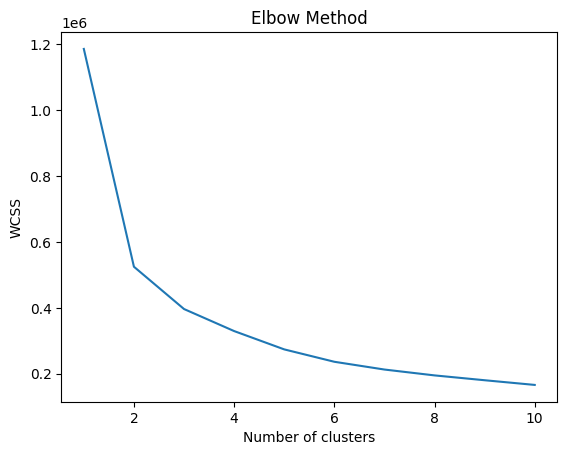

In [141]:
# Determine how many clusters to use based on elbow point
wcss = []

# Test a range of cluster numbers (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
# Apply K-Means Clustering
ss = StandardScaler()
data_ss = ss.fit_transform(data)
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(data_ss)
kmeans.cluster_centers_

array([[-0.29644553, -0.67691761, -0.08453148, -0.13434782,  0.00524571,
        -0.10968364, -0.03977299, -0.03387393, -0.11981965, -0.06249373,
        -0.06772313, -0.01002251,  0.05991482, -0.08618998,  0.07176338,
        -0.70073197],
       [ 0.30955754,  0.70685819,  0.08827038,  0.14029013, -0.00547773,
         0.11453503,  0.04153218,  0.0353722 ,  0.12511937,  0.06525788,
         0.07071857,  0.01046582, -0.0625649 ,  0.09000222, -0.07493753,
         0.73172588]])

In [143]:
# See means for each cluster
data['Cluster'] = kmeans.labels_

# Group data by clusters and calculate the mean for each feature
cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0             18.21659   72.162826              0.513518             0.502611   
1             21.81204   88.211015              0.573167             0.597502   

         Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  \
Cluster                                                                    
0           0.507168         0.470513          0.440553         0.915207   
1           0.504430         0.533436          0.467980         0.933077   

         Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  \
Cluster                                                                   
0                 0.168472       0.371889         0.577727     0.299846   
1                 0.206132       0.417067         0.620397     0.309958   

         Learning_Disabilities  Parental_Education_Level  Distance_fr

[[-0.29644553 -0.67691761 -0.08453148 -0.13434782  0.00524571 -0.10968364
  -0.03977299 -0.03387393 -0.11981965 -0.06249373 -0.06772313 -0.01002251
   0.05991482 -0.08618998  0.07176338 -0.70073197]
 [ 0.30955754  0.70685819  0.08827038  0.14029013 -0.00547773  0.11453503
   0.04153218  0.0353722   0.12511937  0.06525788  0.07071857  0.01046582
  -0.0625649   0.09000222 -0.07493753  0.73172588]]


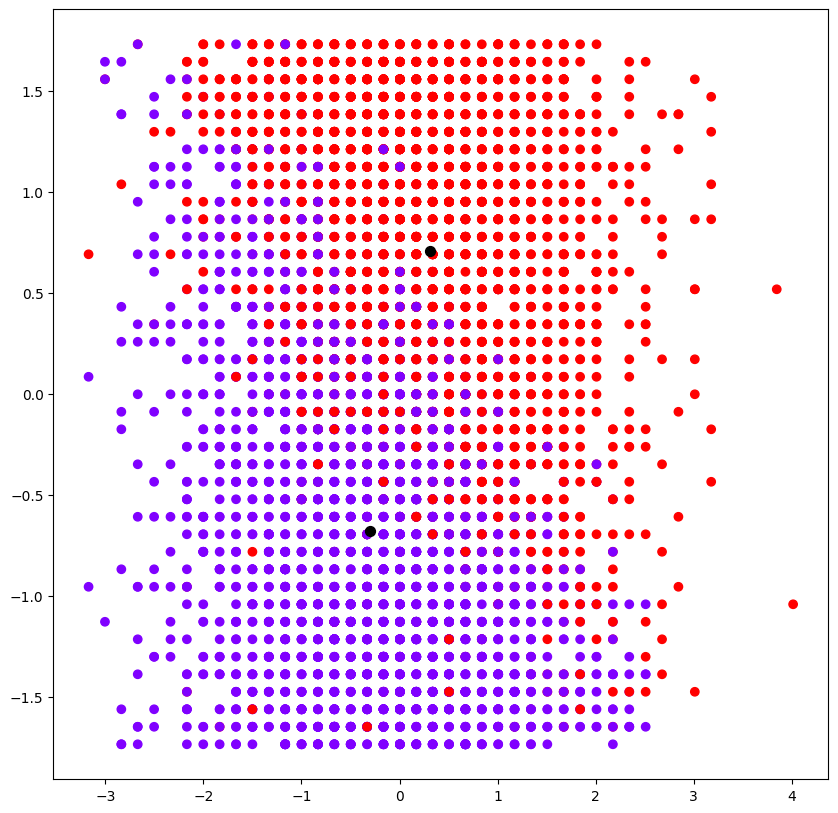

In [144]:
# Visualize the clustering
#Visualizing the clusters and cluster centers
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(data_ss[:,0], data_ss[:,1], c = y_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
plt.show()

In [145]:
# Hieirarchal Clustering
hclust = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data_hclust = hclust.fit(data_ss)
data_hclust_labels = data_hclust.labels_

In [133]:
# Add cluster labels to the DataFrame
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = data_hclust_labels

# Calculate the mean for each feature grouped by clusters
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Print the cluster means
print(cluster_means)

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            18.699486   74.282391              0.518123             0.517447   
1            21.738903   87.933980              0.576651             0.592689   

         Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  \
Cluster                                                                    
0           0.508475         0.479692          0.443873         0.870165   
1           0.502176         0.531153          0.467922         0.998135   

         Tutoring_Sessions  Family_Income  Teacher_Quality  School_Type  \
Cluster                                                                   
0                 0.175480       0.374358         0.582499     0.298891   
1                 0.202676       0.421112         0.620850     0.312943   

         Learning_Disabilities  Parental_Education_Level  Distance_fr

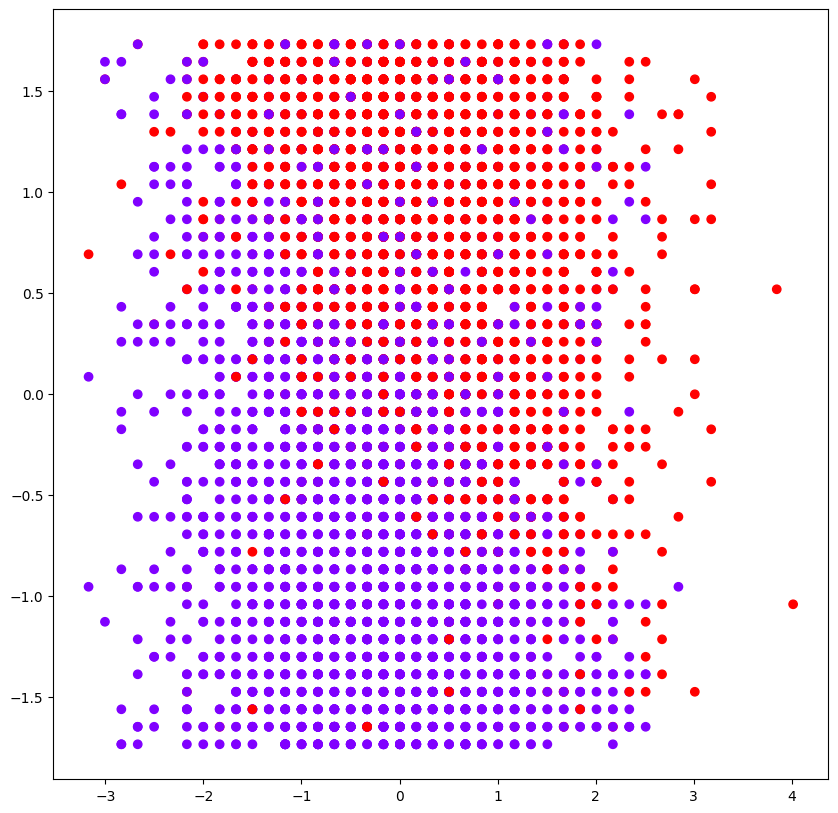

In [134]:
#Visualize clusters
plt.figure(figsize=(10,10))
# Using average drive and fairway p
plt.scatter(data_ss[:,0], data_ss[:,1], c = data_hclust_labels, cmap='rainbow')
plt.show()

In [135]:
#Importing metric libraries
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [136]:
#K-means inertia
# from sklearn
# inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
round(kmeans.inertia_, 1)

#silhouette score for k-means
print("Silhouette Score for K-Means", silhouette_score(data_ss, y_kmeans))

#silhouette score for hclust
print("Silhouette Score for H-Clustering", silhouette_score(data_ss, data_hclust_labels))

#Comparing how much clusters agree
print("Rand Score", rand_score(y_kmeans, data_hclust_labels))

#Comparing how much clusters agree
print("Adjusted Rand Score", adjusted_rand_score(y_kmeans, data_hclust_labels))

Silhouette Score for K-Means 0.1249274056780295
Silhouette Score for H-Clustering 0.10101739209808032
Rand Score 0.8621218471269019
Adjusted Rand Score 0.7242411396957116
